In [5]:
conda update numpy scipy matplotlib seaborn -y


Retrieving notices: done
Note: you may need to restart the kernel to use updated packages.

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\ANSH\anaconda3

  added / updated specs:
    - matplotlib
    - numpy
    - scipy
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.9.9   |       haa95532_0         127 KB
    certifi-2025.8.3           |  py312haa95532_0         160 KB
    freetype-2.13.3            |       h0620614_0         554 KB
    gensim-4.3.2               |  py312hc7c4135_0        20.0 MB
    matplotlib-3.10.5          |  py312haa95532_0          10 KB
    matplotlib-base-3.10.5     |  py312h43afe63_0         9.4 MB
    openssl-3.0.17             |       h35632f6_0         7.8 MB
    scipy-1.16.0               |  py312h242c13b_0        26.6 MB
    seaborn-0

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import kagglehub

In [7]:
# df = pd.read_csv('sample_data/Toyota.csv')
import kagglehub

# Download latest version of dataset
path = kagglehub.dataset_download("nameeerafatima/toyotacsv")

print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/Toyota.csv")

100%|██████████| 15.1k/15.1k [00:00<00:00, 7.73MB/s]

Extracting files...
Path to dataset files: C:\Users\ANSH\.cache\kagglehub\datasets\nameeerafatima\toyotacsv\versions\1


In [8]:
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Price,0
Age,100
KM,0
FuelType,100
HP,0
MetColor,150
Automatic,0
CC,0
Doors,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [ ]:
df.MetColor.tail()

,MetColor
1431,1.0
1432,0.0
1433,0.0
1434,1.0
1435,0.0


In [ ]:
df.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [ ]:
df.Age.mean(), df.Age.median(), df.Age.mode()

(np.float64(55.67215568862275),
 60.0,
 0    65.0
 Name: Age, dtype: float64)

In [ ]:
df.Age.tail(10)

,Age
1426,78.0
1427,NaN
1428,72.0
1429,78.0
1430,80.0
1431,NaN
1432,72.0
1433,NaN
1434,70.0
1435,76.0


In [ ]:
df.fillna(df.Age.median(), inplace=True)

In [ ]:
df.Age.isnull().sum() # this confirms that no missing values are there

np.int64(0)

In [ ]:
df.Doors.replace('five',5,inplace=True)
df.Doors.replace('four',4,inplace=True)
df.Doors.replace('three',3,inplace=True)
df.Doors.replace('3',3,inplace=True)
df.Doors.replace('5',5,inplace=True)
df.Doors.replace('4',4,inplace=True)
df.Doors.replace('2',2,inplace=True)

/tmp/ipython-input-2316529484.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Doors.replace('five',5,inplace=True)
/tmp/ipython-input-2316529484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
df.KM.replace('??',np.nan,inplace=True)
df.HP.replace('????',np.nan,inplace=True)

/tmp/ipython-input-358559914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.KM.replace('??',np.nan,inplace=True)
/tmp/ipython-input-358559914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Price,0
Age,0
KM,15
FuelType,0
HP,6
MetColor,0
Automatic,0
CC,0
Doors,0


In [ ]:
df.KM.tail()

,KM
1431,20544
1432,NaN
1433,17016
1434,NaN
1435,1


In [ ]:
df.HP.tail()

,HP
1431,86
1432,86
1433,86
1434,86
1435,110


In [ ]:
df.MetColor

,MetColor
0,1.0
1,1.0
2,60.0
3,0.0
4,0.0
...,...
1431,1.0
1432,0.0
1433,0.0
1434,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [ ]:
df.MetColor.replace(60.0,np.nan,inplace=True)

In [ ]:
df.MetColor.mode(), df.MetColor.median(), df.MetColor.mean()

(0    1.0
 Name: MetColor, dtype: float64,
 1.0,
 np.float64(0.6749611197511665))

In [ ]:
df.HP = pd.to_numeric(df.HP, errors='coerce')
df.KM = pd.to_numeric(df.KM, errors='coerce')

In [ ]:
df.HP.mode(),df.HP.median(),df.HP.mean()

(0    110.0
 Name: HP, dtype: float64,
 110.0,
 np.float64(101.47832167832168))

In [ ]:
df.fillna(df.HP.mean(), inplace=True)

In [ ]:
df.HP.isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Price,0
Age,0
KM,0
FuelType,0
HP,0
MetColor,0
Automatic,0
CC,0
Doors,0


In [ ]:
df.Age

,Age
0,23.0
1,23.0
2,24.0
3,26.0
4,30.0
...,...
1431,60.0
1432,72.0
1433,60.0
1434,70.0


In [ ]:
df.Age.isnull().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [ ]:
df.FuelType.value_counts()

,count
FuelType,
Petrol,1177
Diesel,144
60.0,100
CNG,15


In [ ]:
df.FuelType.replace(60.0,np.nan,inplace=True)
df.FuelType.fillna(df.FuelType.mode()[0], inplace=True)

/tmp/ipython-input-1446865776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.FuelType.replace(60.0,np.nan,inplace=True)
/tmp/ipython-input-1446865776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.FuelType.isnull().sum()

np.int64(0)

In [ ]:
df.MetColor.value_counts()

,count
MetColor,
1.000000,868
0.000000,418
101.478322,150


/tmp/ipython-input-983420530.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)
/tmp/ipython-input-983420530.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.KM)
/tmp/ipython-input-983420530.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

<Axes: xlabel='Price', ylabel='Density'>

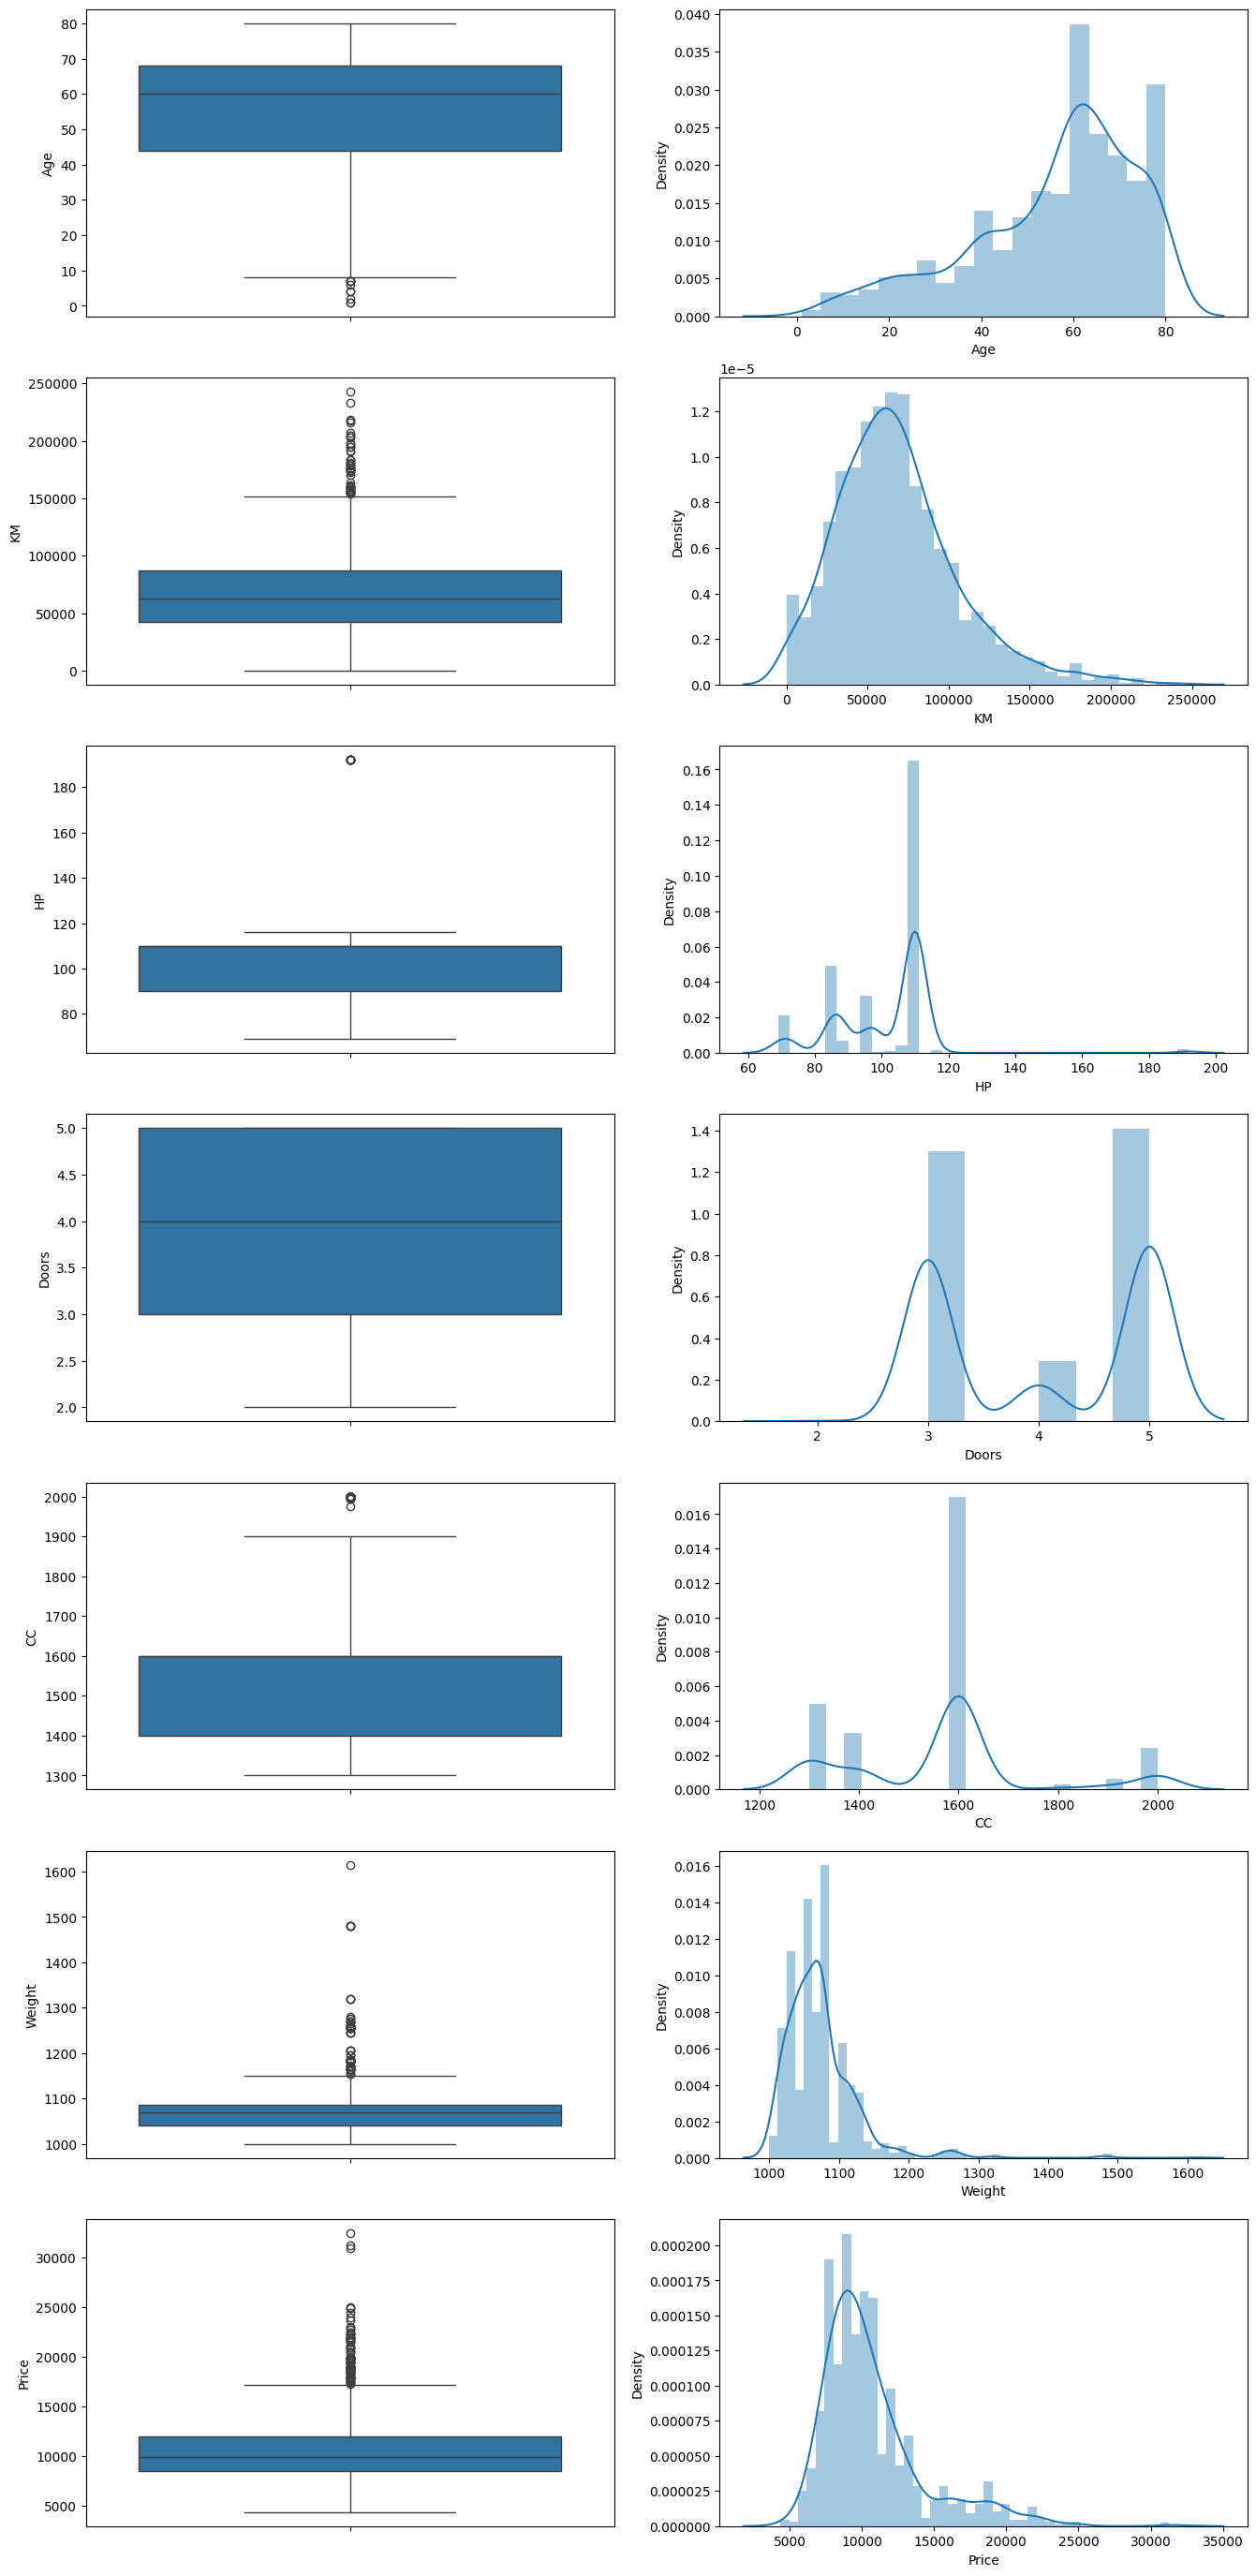

In [ ]:
plt.figure(figsize=(16, 40))
plt.subplot(8, 2, 1)
sns.boxplot(df.Age)
plt.subplot(8, 2, 2)
sns.distplot(df.Age)
plt.subplot(8, 2, 3)
sns.boxplot(df.KM)
plt.subplot(8, 2, 4)
sns.distplot(df.KM)
plt.subplot(8, 2, 5)
sns.boxplot(df.HP)
plt.subplot(8, 2, 6)
sns.distplot(df.HP)
plt.subplot(8, 2, 7)
sns.boxplot(df.Doors)
plt.subplot(8, 2, 8)
sns.distplot(df.Doors)
plt.subplot(8, 2, 9)
sns.boxplot(df.CC)
plt.subplot(8, 2, 10)
sns.distplot(df.CC)
plt.subplot(8, 2, 11)
sns.boxplot(df.Weight)
plt.subplot(8, 2, 12)
sns.distplot(df.Weight)
plt.subplot(8, 2, 13)
sns.boxplot(df.Price)
plt.subplot(8, 2, 14)
sns.distplot(df.Price)

In [ ]:
d = [11, 12, 24, 11, 14, 12, 15, 11, 12, 13, 12, 13, 14, 102, 12, 11, 13, 14, 107, 15, 11, 12, 14, 108, 11, 14, 16, 60, 140]
len(d)

29

In [ ]:
def detect_outliers_std(lower_l, upper_l, data) :
  outliers = []
  for i in data:
    if(i < lower_l or i > upper_l):
      outliers.append(i)
  return outliers

In [ ]:
lower_l = np.mean(d) - 3*np.std(d)
upper_l = np.mean(d) + 3*np.std(d)
print(lower_l, upper_l)
detect_outliers_std(lower_l, upper_l, d)

-78.53115661420546 136.0483979935158


[140]

/tmp/ipython-input-4230483800.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d)


<Axes: ylabel='Density'>

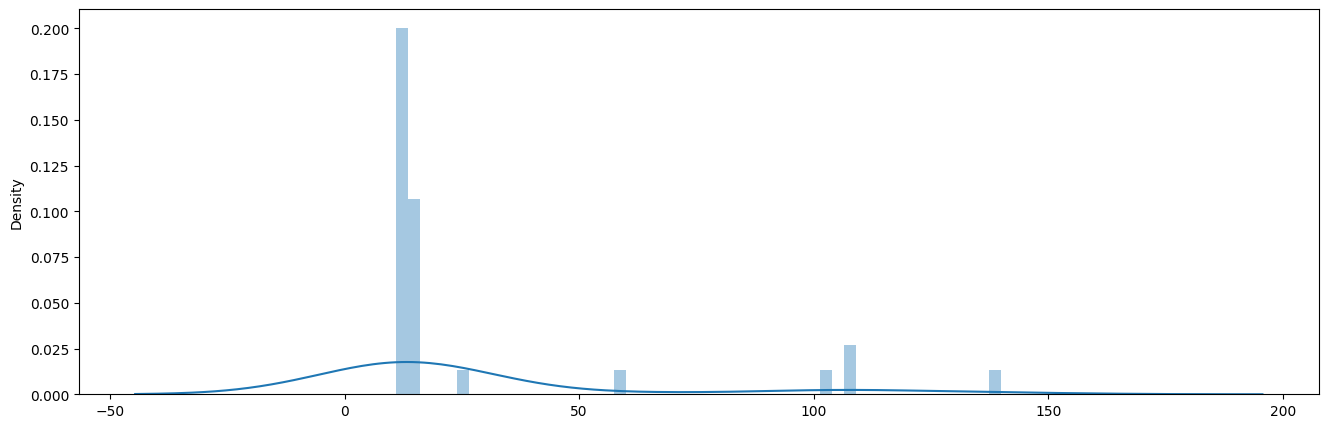

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(d)

In [ ]:
def detect_outliers_z_score(d, threshold):
    outliers = []
    mean = np.mean(d)
    std = np.std(d)
    for x in d:
        z_score = np.abs((x - mean)/std)
        if np.ceil(z_score)>threshold:
            outliers.append(x)
    return outliers


In [ ]:
detect_outliers_z_score(d,2)

[102, 107, 108, 140]

In [ ]:
detect_outliers_z_score(d,3)

[140]

In [ ]:
q1, q3 = np.percentile(d, [25, 75])
print("Quartile 1:", q1)
print("Quartile 3:", q3)
iqr = q3-q1
print("Inter Quartile Range:", iqr)

Quartile 1: 12.0
Quartile 3: 15.0
Inter Quartile Range: 3.0


In [ ]:
lower_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)
print(lower_bound)
print(upper_bound)

7.5
19.5


In [ ]:
def detect_outliers_iqr(d, lb, up):
    outliers = []
    for i in d:
        if i<lb or i>up:
            outliers.append(i)
    return outliers

In [ ]:
detect_outliers_iqr(d,lower_bound, upper_bound)

[24, 102, 107, 108, 60, 140]

In [ ]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Convert 'Doors', 'KM', and 'HP' to numeric, coercing errors
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce')
df['KM'] = pd.to_numeric(df['KM'], errors='coerce')
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')

# Drop rows with NaN values that resulted from coercion, or fill them
# For now, let's drop rows with NaN values in the relevant columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number).dropna()

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
display(correlation_matrix)

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Unnamed: 0,1.000000,-0.738289,0.874885,0.271411,-0.108220,0.014004,0.066299,-0.184490,-0.130268,-0.414577
Price,-0.738289,1.000000,-0.844735,-0.568259,0.308414,-0.018582,0.033081,0.165067,0.185326,0.581198
Age,0.874885,-0.844735,1.000000,0.490803,-0.154057,0.016283,0.032650,-0.117639,-0.152969,-0.442750
KM,0.271411,-0.568259,0.490803,1.000000,-0.318459,-0.010926,-0.080263,0.291886,-0.032084,-0.034996
HP,-0.108220,0.308414,-0.154057,-0.318459,1.000000,-0.005272,0.013753,0.053466,0.096938,0.086214
MetColor,0.014004,-0.018582,0.016283,-0.010926,-0.005272,1.000000,0.006198,0.024386,-0.061015,-0.031222
Automatic,0.066299,0.033081,0.032650,-0.080263,0.013753,0.006198,1.000000,-0.069321,-0.027654,0.057249
CC,-0.184490,0.165067,-0.117639,0.291886,0.053466,0.024386,-0.069321,1.000000,0.126768,0.651450
Doors,-0.130268,0.185326,-0.152969,-0.032084,0.096938,-0.061015,-0.027654,0.126768,1.000000,0.302618
Weight,-0.414577,0.581198,-0.442750,-0.034996,0.086214,-0.031222,0.057249,0.651450,0.302618,1.000000


<Axes: >

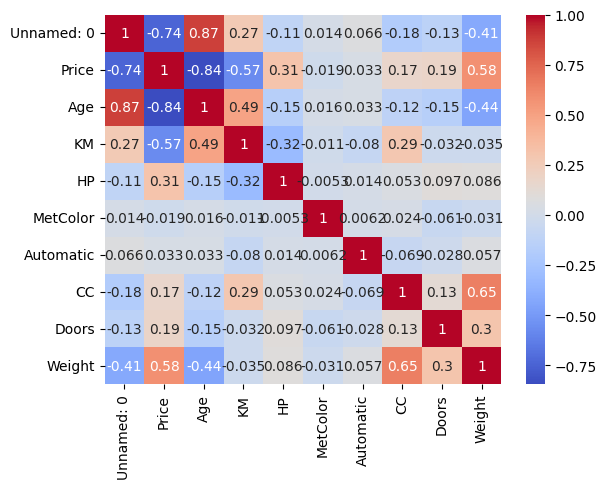

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [ ]:
df.FuelType.value_counts()

,count
FuelType,
Petrol,1277
Diesel,144
CNG,15


In [ ]:
dfc = df.corr()
dfc.Price.sort_values(ascending=False)

ValueError: could not convert string to float: 'Diesel'

In [ ]:
df.FuelType.value_counts()

,count
FuelType,
Petrol,1277
Diesel,144
CNG,15


In [ ]:
# Perform one-hot encoding on the 'FuelType' column
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

# Calculate the correlation matrix on the encoded DataFrame
dfc = df_encoded.corr()

# Display the correlation of 'Price' with other variables
display(dfc.Price.sort_values(ascending=False))

,Price
Price,1.000000
Weight,0.581198
HP,0.308414
Doors,0.185326
CC,0.165067
Automatic,0.033081
FuelType_Diesel,0.014590
FuelType_Petrol,-0.003437
MetColor,-0.018582
KM,-0.568259


In [ ]:
df.Automatic = df.Automatic.astype("int")
df.Automatic.dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   FuelType    1436 non-null   object 
 5   HP          1436 non-null   float64
 6   MetColor    1436 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   int64  
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 123.5+ KB


In [ ]:
encoded_df=pd.get_dummies(df)

In [ ]:
encoded_df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'FuelType_CNG', 'FuelType_Diesel',
       'FuelType_Petrol'],
      dtype='object')

In [ ]:
encoded_df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'FuelType_CNG', 'FuelType_Diesel',
       'FuelType_Petrol'],
      dtype='object')

In [ ]:
df.FuelType = df.FuelType.astype('category')
df.FuelType.dtype

CategoricalDtype(categories=['CNG', 'Diesel', 'Petrol'], ordered=False, categories_dtype=object)

In [ ]:
# trying to give numeric values to the FuelType

df['FuelType_Cat'] = df.FuelType.cat.codes
print(df.FuelType.value_counts())
print(df.FuelType_Cat.value_counts())

FuelType
Petrol    1277
Diesel     144
CNG         15
Name: count, dtype: int64
FuelType_Cat
2    1277
1     144
0      15
Name: count, dtype: int64
